In [1]:
import os
import numpy as  np
import matplotlib.pyplot as plt
import json
import config
from matplotlib.path import Path
import cv2




In [2]:
config.IMAGE_DIRECTORY

'/home/elmar/Cigarette_buts_detection/cigarette_buts/out/image/buts'

In [16]:
def resize_image(directory):
    '''
    resizes the images in directory according to dimensions in the config file.
    Args: directory(str)
    
    '''
    for filename in os.listdir(directory):
        if filename.split('.')[1] == 'jpg':
            filename = os.path.join(directory , filename)
            img = cv2.imread(filename)
            img = cv2.resize(img , (config.IMG_HEIGHT , config.IMG_WIDTH))
            cv2.imwrite(filename , img)

In [11]:
def rename_files(file_directory):
    ''' 
    renames the file names in image directory in this format -> cgrt_0.jpg , cgrt_1.jpg .... 
    Args: file_directory 

    '''
    i = 1
    for filename in os.listdir(file_directory):
        if filename.split('.')[1] == 'jpg':
            filename = os.path.join(file_directory , filename)
            renamed_file = os.path.join(file_directory , f'cgrt_{i}.jpg')
            print(filename , "   " ,  renamed_file)
            os.rename(filename , renamed_file)
            i+=1


In [12]:
def generate_mask(filename , json_file):
    '''
    generates a binary mask as ground truth for each image.
    Args: json_file
    '''

    with open(json_file, "r") as read_file:
        data = json.load(read_file)
    shapes = data['shapes']

    polygons = dict()
    for polygon_index in range(len(shapes)):
        polygons[polygon_index] = shapes[polygon_index]['points']
    
    for points in polygons:
        for index in range(len(polygons[points])):
            polygons[points][index][0] = round(polygons[points][index][0])
            polygons[points][index][1] = round(polygons[points][index][1]) 
            polygons[points][index] = tuple(polygons[points][index])

    x, y = np.meshgrid(np.arange(config.IMG_WIDTH), np.arange(config.IMG_HEIGHT))
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T
    grid = np.zeros(config.IMG_HEIGHT*config.IMG_WIDTH)
    for polygon in polygons:
        path = Path(polygons[polygon])
        grid = grid.astype(float)
        grid += path.contains_points(points).astype(float)
        
    grid = grid.reshape((config.IMG_HEIGHT, config.IMG_WIDTH))
    grid = grid.astype(bool).astype(float)

    mask_file_name = os.path.join(config.MASK_DIRECTORY, filename.split('.')[0])
    np.save(mask_file_name , grid)



In [13]:
def crop_images(directory_path):
    '''
    for a given directory crop images from bottom to get rid of noise that we had because of camera.
    Args: directory_path(str)
    '''
    for image_path in os.listdir(directory_path):
        image_path = os.path.join(directory_path , image_path)
        _crop_images(image_path)



def _crop_images(image_path):
    '''
    for a given path crop image from bottom to get rid of noise that we had because of camera.
    Args: image_path(str)
    '''
    img = plt.imread(image_path)
    crop_img = img[:config.IMG_HEIGHT - 30, :] # [height , width]
    plt.imsave(image_path, crop_img)

In [14]:
def generate_img_over_bg(image_path , mask_path , bg_image_path):
    '''
    project a segmented objects over background image
    Args: image_path(str) , mask_path(str) , bg_image_path(str)
    '''
    
    img = plt.imread(image_path)
    mask = np.load(mask_path)
    bg_img = plt.imread(bg_image_path)
    positions = np.where(mask > 0)
    merged = bg_img.copy()

    for pos_x , pos_y in zip(positions[0] , positions[1]):
        merged[pos_x , pos_y] = img[pos_x , pos_y]

    return (merged, mask)

In [8]:
crop_images(config.IMAGE_DIRECTORY)

In [19]:
# rename_files(config.IMAGE_DIRECTORY)


In [17]:
resize_image('/home/elmar/Downloads/cig_butts/real_test')
# # resize_image(config.BACKGROUND_DIRECTORY)
# import os
# image_path = [ os.path.join(config.IMAGE_DIRECTORY, i) for i in os.listdir(config.IMAGE_DIRECTORY)]
# image_path

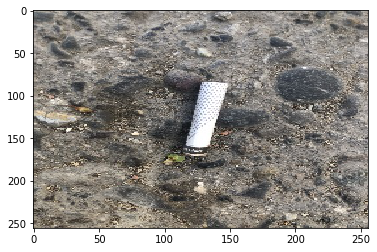

In [21]:
# mask = np.load('../out/mask/cgrt_2.npy')
img_index = 26
img = plt.imread(image_path[img_index])
plt.imshow(img, aspect='auto')

In [26]:
generate_mask('cgrt_1.jpg', '../out/image/buts/cgrt_1.json')
generate_mask('cgrt_2.jpg', '../out/image/buts/cgrt_2.json')


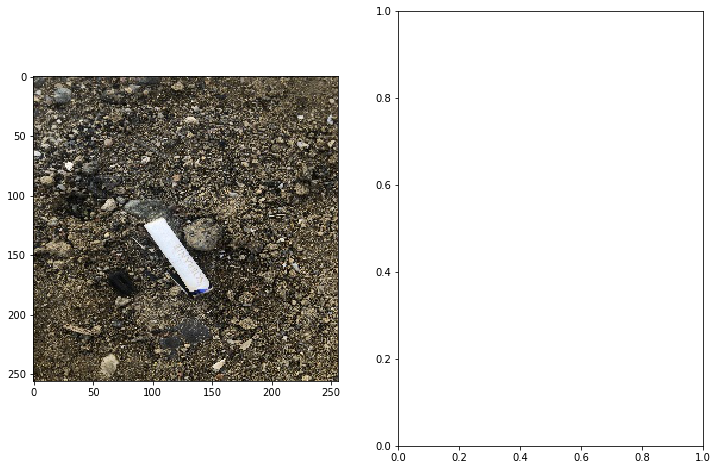

In [17]:
fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
ax[0].imshow(img)
# ax[1].imshow(mask)

In [41]:
test = plt.imread('../out/image/buts/cgrt_2.jpg')
type(test)

numpy.ndarray

In [35]:
mask = np.load('../out/mask/cgrt_2.npy')
positions = np.where(mask > 0)
positions

(array([ 28,  28,  28, ..., 239, 239, 240]),
 array([108, 109, 110, ..., 144, 145, 145]))

In [36]:
new_img = np.zeros((256 , 256 , 3))

In [37]:
for pos_x , pos_y in zip(positions[0] , positions[1]):
    new_img[pos_x , pos_y] = img[pos_x , pos_y]
    
new_img = new_img.astype(np.uint8)
 # new_img[pos[0] , pos[1]]
    # print(pos_x , pos_y)


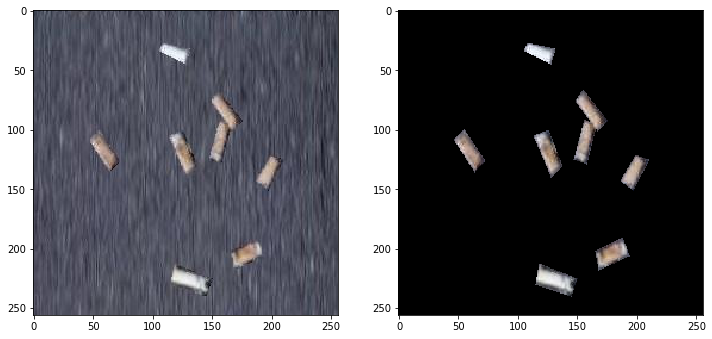

In [38]:
fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
ax[0].imshow(img)
ax[1].imshow(new_img)

In [20]:
_crop_images('../out/image/bg/bg_1.jpg')

In [29]:
def generate_img_over_bg(image_path , mask_path , bg_image_path):
    '''
    project a segmented objects over background image
    Args: image_path(str) , mask_path(str) , bg_image_path(str)
    '''
    img = plt.imread(image_path)
    mask = np.load(mask_path)
    bg_img = plt.imread(bg_image_path)

    positions = np.where(mask > 0)
    merged = bg_img.copy()
    for pos_x , pos_y in zip(positions[0] , positions[1]):
        merged[pos_x , pos_y] = img[pos_x , pos_y]
    
    return (merged, mask)

In [35]:
data = list()
tup = generate_img_over_bg('../out/image/buts/cgrt_1.jpg' ,'../out/mask/cgrt_2.npy' ,  '../out/image/bg/bg.jpg')
data.append(tup)

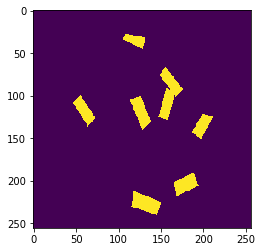

In [37]:
plt.imshow(data[0][0])
plt.imshow(data[0][1])

In [1]:
from albumentations.augmentations import transforms
hr_img = transforms.VerticalFlip().apply(img)
hr_mask = transforms.VerticalFlip().apply_to_mask(mask)
plt.imshow(hr_img)
plt.imshow(hr_mask)

NameError: name 'img' is not defined

In [1]:
def load_images(image, mask):
    '''
    load images to in the format of tuple(image, mask) to the list.
    Args:
        image(nd.array), mask(nd.array).
    Returns:
        list of tuples.
    '''
    
    pass
    
    




In [1]:
import dataset
import config
db = dataset.Dataset(config.db_name)

In [6]:
paths = db.load_paths(db.con, 1)
paths

[('/home/elmar/Cigarette_buts_detection/cigarette_buts/out/image/buts/cgrt_1.jpg',
  '/home/elmar/Cigarette_buts_detection/cigarette_buts/out/mask/cgrt_1.npy')]

In [7]:
import sys
sys.path.append('../')
sys.path.append("/home/elmar/Cigarette_buts_detection")

In [8]:
from cigarettNet.dataset import utils
from cigarettNet.dataset import dataset
from cigarettNet.dataset import query

In [9]:
tr_ds = utils.Utils(paths).load_images()


In [11]:
tr

AttributeError: 'list' object has no attribute 'dtype'

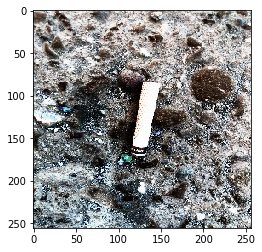

In [137]:
import cv2 
# plt.hist(img.flatten(), 256, [0,256], color = 'g')
tst = cv2.imread(path)

equR = cv2.equalizeHist(tst[:, :, 0])
equG = cv2.equalizeHist(tst[:, :, 1])
equB = cv2.equalizeHist(tst[:, :, 2])

out = cv2.merge((equR, equG , equB))
plt.imshow(out)
plt.imshow(tst)


# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# cl1 = clahe.apply(tst[:, :, 0])
# cv2.imwrite('/home/elmar/Documents/cl1.png' , cl1)
# plt.imshow(tst)
# plt.imshow(equ)
# plt.show()

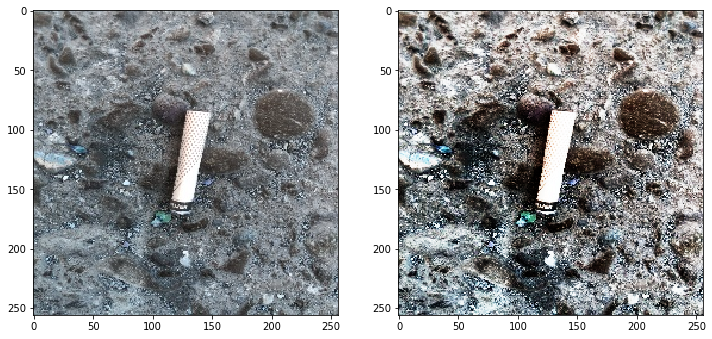

In [138]:
fig, ax = plt.subplots(1 , 2, figsize=(12, 8))
ax[0].imshow(tst)
ax[1].imshow(out)

In [101]:
tst[..., :4].shape

(3024, 4032, 3)